In [91]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

In [11]:
G = nx.Graph()

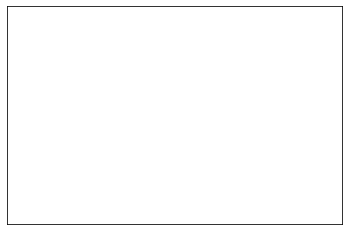

In [12]:
nx.draw_networkx(G)

In [20]:
G.add_edges_from([
    (1,2),
    (1,3),
    (1,5),
    (2,4),
    (4,3),
    (3,5),
    (4,6)])


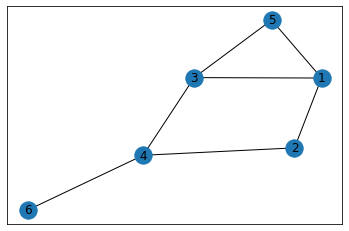

In [21]:
nx.draw_networkx(G)

 - <s>The links to be swapped should have the largest edge betweenness values!</s> 
 - In case of equal betweennesses, choose the two candidates randomly. 
 - The ending node of the edges with higher degree should be swapped, or in case of equality, choose the node at random.

### The links to be swapped should have the largest edge betweenness values!

In [78]:
from itertools import chain 
from collections import Counter
#Find edge betweeness centrality (for edges)
betw_centr = nx.edge_betweenness_centrality(G)

# printing initial_dictionary 
betw_centr

{(1, 2): 0.23333333333333334,
 (1, 3): 0.16666666666666666,
 (1, 5): 0.13333333333333333,
 (2, 4): 0.23333333333333334,
 (3, 4): 0.36666666666666664,
 (3, 5): 0.2,
 (4, 6): 0.3333333333333333}

In [81]:
####equal betweennesses
# finding duplicate values 
# from dictionary using set 
rev_dict = {} 
for key, value in betw_centr.items(): 
    rev_dict.setdefault(value, set()).add(key) 
    
result = set(chain.from_iterable( 
         values for key, values in rev_dict.items() 
         if len(values) > 1)) 
  
# printing result 
print(" \n resultant key", str(result))

 
 resultant key {(1, 2), (2, 4)}


In [83]:
#Should be swaped
Counter(betw_centr).most_common(2)

[((3, 4), 0.36666666666666664), ((4, 6), 0.3333333333333333)]

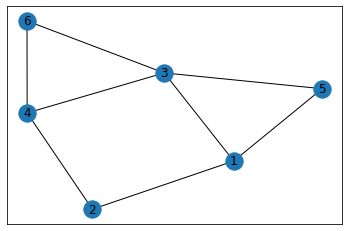

In [89]:
#Define 2 new edges from that which we had found
#Remove 2 found edges 
#Add new edges

adj = [(3, 6),
       (4, 4)]

G.update(edges=adj)

nx.draw_networkx(G)

### In case of equal betweennesses, choose the two candidates randomly.

In [90]:
#equal betweennesses
rev_dict = {} 
for key, value in betw_centr.items(): 
    rev_dict.setdefault(value, set()).add(key) 
    
result = set(chain.from_iterable( 
         values for key, values in rev_dict.items() 
         if len(values) > 1)) 
  
# printing result 
print(" \n resultant key", str(result))

 
 resultant key {(1, 2), (2, 4)}


In [92]:
random.sample(set(result), 2)

[(2, 4), (1, 2)]

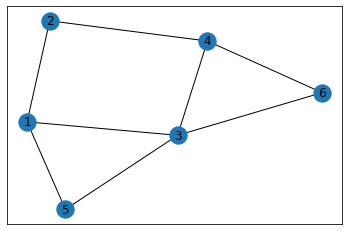

In [121]:
res = []
for i in result:
    res.append(random.sample(i, 1))
    
flat_list = [item for sublist in res for item in sublist]

G.update(edges=[tuple(flat_list)])

nx.draw_networkx(G)

In [122]:
#Find edge betweeness centrality (for edges)
betw_centr = nx.edge_betweenness_centrality(G)

#final edge betweeness centrality
betw_centr

{(1, 2): 0.2,
 (1, 3): 0.2,
 (1, 5): 0.13333333333333333,
 (2, 4): 0.2,
 (3, 4): 0.2,
 (3, 5): 0.2,
 (3, 6): 0.2,
 (4, 6): 0.13333333333333333,
 (4, 4): 0.0}